___
María del Carmen Martínez Hernández\
Sindy Citlali Sánchez Ponce\
Carolina Anidsel Casillas García   
___
## 1.1 Generación de Terrenos Aleatorios.

### 1.2 Introducción
> Un fractal es un objeto geométrico caracterizado por presentar una estructura que se repite a diferentes escalas. En cierto modo, se trata de un patrón sin fin. (Fernández Cara, 2018)

> Los geometría fractal es útil para modelar formas complejas de la naturaleza. Una de sus muchas aplicaciones es para generar terrenos. Un terreno fractal, es una superficie generada usando un algoritmo diseñado para producir un comportamiento fractal que mimetiza la apariencia de un terreno natural. En otras palabras, el resultado de este procedimiento es una superficie aleatoria que exhibe comportamiento fractal. (Fractal landscape, 2022)

> Para la generación de terrenos utilizamos el algoritmo del diamante-cuadrado. El algoritmo del diamante-cuadrado comienza con una matriz cuadrada, bidimensional de ancho y alto $2^n + 1$. Las cuatro esquinas de la matriz inician con el mismo valor de altura.

> Tomando lo anterior como punto de partida, comienza una rutina iterativa que consta de dos pasos:
> 1. Paso Diamante
> Para cada cuadrado de la matriz, se genera un valor aleatorio en el punto medio del cuadrado, donde se intersecan las dos diagonales. El valor del punto medio se calcula promediando los cuatro valores de las esquinas, más una cantidad aleatoria. 
> 2. Paso Cuadrado
> Para cada diamante de la matriz, se establece un valor aleatorio en el centro del diamante. Se calcula el valor del punto medio promediando los valores de las esquinas, más una cantidad aleatoria generada en el mismo rango que se usó para el paso diamante. Esto te da cuadrados de nuevo.\
(Martz)
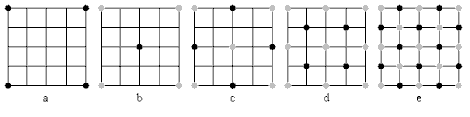

### 1.3 Objetivos.
> #### 1.1 Objetivo general.
>  - Generar terrenos con fractales utilizando el algoritmo de diamante cuadrado.
> #### 1.2 Objetivos específicos
>  - Comprender y utilizar el algoritmo del diamente-cuadrado.
>  - Graficar datos en 3D.
>  - Utilizar números aleatorios.

### 1.4 Modelo que representa el problema.
> - Se debe incluir las ecuaciones que rigen el sistema que se está estudiando.
> - Deducción del modelo. Explicación detallada de las ecuaciones de acuerdo al problema que se quiera resolver o modelo que se quiera representar.
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).

### 1.5 Solución del problema.


In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
#colocamos matriz inicial
matriz = np.zeros((3,3))
#ponemos variables iniciales que definen el tamaño y smoth de nuestra superficie
rango=1
h=0.1
maxstep = 5

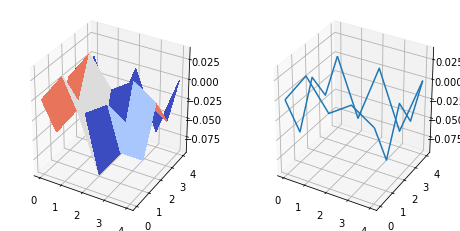

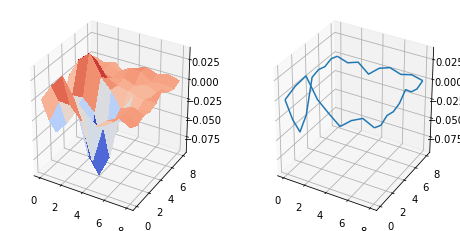

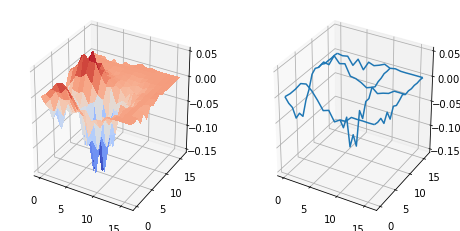

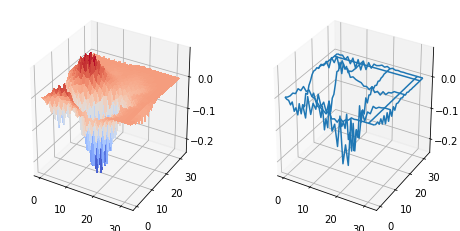

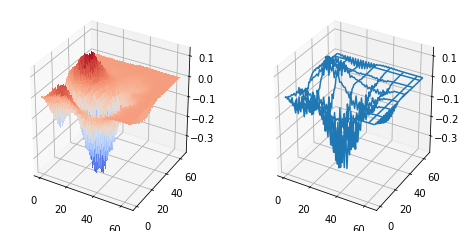

In [3]:
for step in range(maxstep):
    rango=rango*h*2**(-h)
    mborde = np.pad(matriz,pad_width=1,mode="constant",constant_values=0)
    #print(mborde)
    n = len(mborde)
    m2 = np.zeros((2*n-3,2*n-3))
    
    n2 = len(m2)
    #cuadrado
    for i in range (1, n-3):
        for j in range (1, n-3):
            m2[2*i-1,2*j-1]=mborde[i,j]
            #print(m2[i,j])
            #print(2*i-1,2*j-1)
    #print(m2)
    #centro de los cuadrados       
    mcuadrados = m2
    
    for i in range (2,n2-1, 2):
        for j in range (2,n2-1,2):
            #print(i,j)
            aleatorio = (random.choices([0.2,0.4,0.8],weights=[3,5,2],k=1))
            #print(aleatorio[0])
            aumento = 2*rango*aleatorio[0]-rango
            #print(aumento)
            mcuadrados[i,j] = (m2[i-1,j-1]+m2[i+1,j+1]+m2[i+1,j-1]+m2[i-1,j+1])*0.25 + aumento 
    #print(mcuadrados)
    m2 = mcuadrados
    #hacer que los bordes coinsidan con las columnas interiores, para sacar el triangulo
    m2[:,0]=mcuadrados[:,-3]
    m2[:,-1] = mcuadrados[:,2]
    m2[0,:] = mcuadrados[-3,:]
    m2[-1,:]=mcuadrados[:,2]
    #print(m2)
    
    #hacer el centro de los diamantes
    mdiamante = m2
    
    for i in range(1,n2-1):
        for j in range(2-((i+1)%2),n2-1,2):
            aleatorio = (random.choices([0.2,0.4,0.8],weights=[5,5,5],k=1))
            #print(aleatorio[0])
            aumento = 2*rango*aleatorio[0]-rango
            #print(aumento)
            mdiamante[i,j]=(m2[i-1,j]+m2[i+1,j]+m2[i,j-1]+m2[i,j+1])*0.5+aumento
    #print(mdiamante)
    
    #remover los bordes
    
    matriz = mdiamante[1:-1,1:-1]
    
    
    #print(matriz)
    dimension = len(matriz)
    x= np.zeros((dimension,dimension))
    y= np.zeros((dimension,dimension))
    cont = 0
    for i in range(dimension):
        for j in range(dimension):
            x[i,j]=j
            y[i,j]=i
            #cont=cont+1
            
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    
    surf = ax.plot_surface(x, y, matriz, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_wireframe(x, y, matriz, rstride=10, cstride=10)

    plt.show()

### 1.6 Visualización de la solución del problema.
> Se deben mostrar gráficas y/o tablas que ilustren de forma adecuada los resultados. No olviden etiquetar los ejes y si se tienen varias curvas en una sola gráfica también etiquetarlas (ojo: que las curvas se puedan diferenciar con colores y estilos de línea).

### 1.7 Conclusiones.
> Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.8 Referencias.
> Citar (en formato APA) la bibliografía utilizada.